# Baby Names app prototype

## Import libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as mstyle
import datadotworld as ddw
from __future__ import print_function
%matplotlib inline
%load_ext watermark
mstyle.use('fivethirtyeight')

In [2]:
%watermark -v -p pandas,numpy,matplotlib,datadotworld

CPython 3.5.1
IPython 6.0.0

pandas 0.18.1
numpy 1.12.1
matplotlib 2.0.0
datadotworld 1.1.0


## Load data with datadotworld Python SDK

In [3]:
query = ddw.query('government/us-baby-names-by-yob', 
 'SELECT * FROM `babyNamesUSYOB-mostpopular.csv/babyNamesUSYOB-mostpopular`')
df = query.dataframe

## Baby Names popularity plot

In [4]:
def baby():

    try:
        # prep data
        names = input("Enter 1 or more names: ")
        names = names.replace(',', ' ')
        names = names.split()
        names = [i.lower() for i in names]        
        nn = df.set_index('Name')
        nn.index = nn.index.str.lower()
        nn = nn.loc[names, ['YearOfBirth', 'Number']].reset_index()
        nn = nn.groupby(['Name','YearOfBirth']).agg('sum').unstack('Name')
        
        # create plot
        fig, ax = plt.subplots(figsize=(15, 7))
        nn.plot(ax = ax)
        plt.title('Name Popularity by Year',fontsize=20)
        plt.legend(title='', labels=sorted(names), fontsize='x-large')        
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Year of Birth', fontsize=16)
        plt.ylabel('Count', fontsize=16)
        plt.show()       
       
    except:
        print("I didn't recognize that")
        baby()

Enter 1 or more names: Bryon Brian Bryan


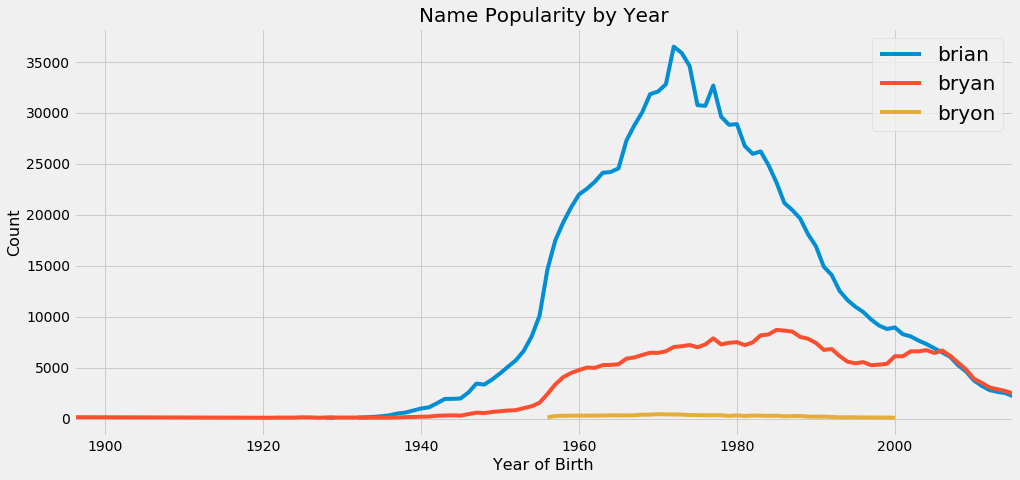

In [5]:
baby()

In [6]:
def most_pop():
    print("Find the most popular baby names for a given year!")
    
    def gend():
        gender = input("Which gender? ('m' or 'f'): ")
        gender = gender.upper()
        if (gender != 'M') & (gender != 'F'):
            print("I didn't understand that")
            gender = gend()
        return gender
    
    
    def year_():
        yr = input("Which year? (1880-2010): ")
        try:
            yr = int(yr)
        except:
            print("I didn't understand that")
            yr = year_()
        if yr not in range(1880,2011):
            print("I didn't understand that")
            yr = year_()
        return int(yr)
    
    
    def numb():
        nbr = input("Enter number of names: ")
        try:
            nbr = int(nbr)
        except:
            print("I didn't understand that")
            nbr = numb()    
        
        if nbr > 0:
            return nbr
        else:
            return 0       
    
    gender = gend()
    year = year_()
    number = numb() 
    
    return df[df.Sex == gender].groupby(['YearOfBirth','Name']).sum().loc[year].\
                        sort_values(by='Number', ascending=False).head(n=number)    

In [7]:
# returns pandas dataframe
most_pop()
# to return arrays try most_pop().index or most_pop().Number or most_pop.Number.values

Find the most popular baby names for a given year!
Which gender? ('m' or 'f'): m
Which year? (1880-2010): 1976
Enter number of names: 10


,Number
Name,
Michael,66966
Jason,52687
Christopher,45223
David,39298
James,38310
John,33995
Robert,33814
Brian,30537
Matthew,29993
